# Introduction: Customer Segmentation Using Unsupervised Learning

## Objective: Cluster customers based on spending habits and propose marketing strategies tailored to each segment

### Objective1: Import Libraries

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
print("✅ Libraries imported successfully.")

✅ Libraries imported successfully.


### Objective2: Load Dataset

In [2]:
#  Load Dataset
df = pd.read_csv("C:/Users/luqma/Downloads/archive/customer_shopping_data.csv")

print("✅ Dataset Loaded Successfully!")
print("\n📊 First 5 rows of dataset:\n")
df.head()

✅ Dataset Loaded Successfully!

📊 First 5 rows of dataset:



,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [3]:
#Shape of Dataset
print("\n📐 Shape of dataset:", df.shape)


📐 Shape of dataset: (99457, 10)


### Objective 3: Info Of dataset

In [4]:
# Dataset Info & Missing Values
print("ℹ️ Dataset Information:")
df.info()

ℹ️ Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [5]:
print("\n🔎 Checking for missing values:")
print(df.isnull().sum())


🔎 Checking for missing values:
invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


In [6]:
# Basic Statistics
print("📊 Summary Statistics:")
df.describe()

📊 Summary Statistics:


,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


### Objective 4: Exploratory Data Analysis (EDA)


👥 Gender Distribution:
 gender
Female    59482
Male      39975
Name: count, dtype: int64


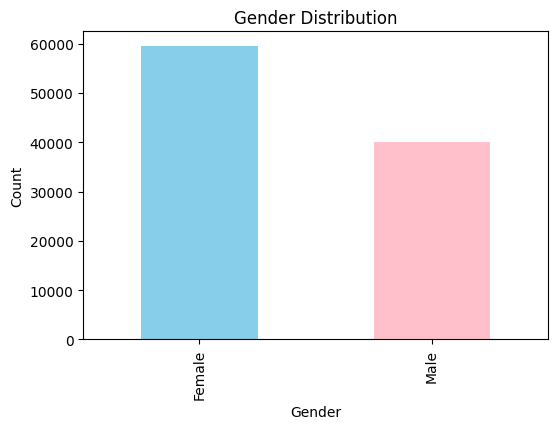

In [7]:

# Distribution of Gender
gender_counts = df['gender'].value_counts()
print("\n👥 Gender Distribution:\n", gender_counts)

plt.figure(figsize=(6,4))
gender_counts.plot(kind='bar', color=['skyblue','pink'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

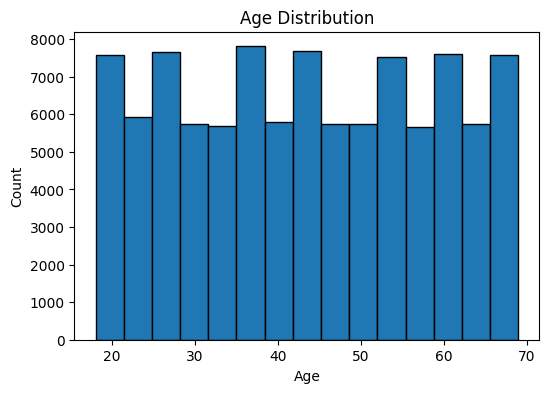

In [8]:
# Age Distribution
plt.figure(figsize=(6,4))
plt.hist(df['age'], bins=15, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


📦 Category Distribution:
 category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64


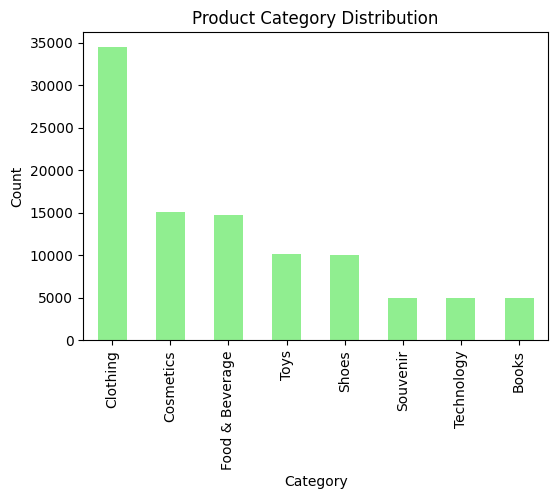

In [9]:
# Category Distribution
category_counts = df['category'].value_counts()
print("\n📦 Category Distribution:\n", category_counts)

plt.figure(figsize=(6,4))
category_counts.plot(kind='bar', color='lightgreen')
plt.title("Product Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

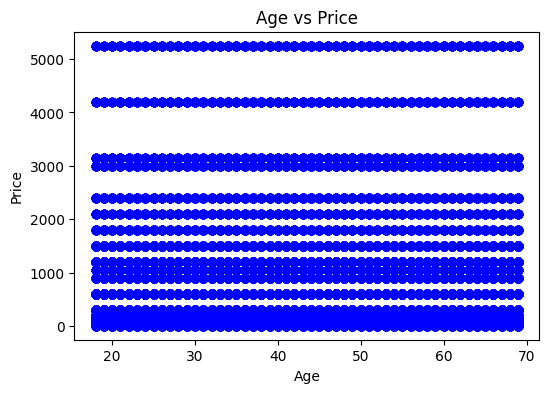

In [10]:
# Age vs Price
plt.figure(figsize=(6,4))
plt.scatter(df['age'], df['price'], c='blue', alpha=0.6)
plt.title("Age vs Price")
plt.xlabel("Age")
plt.ylabel("Price")
plt.show()

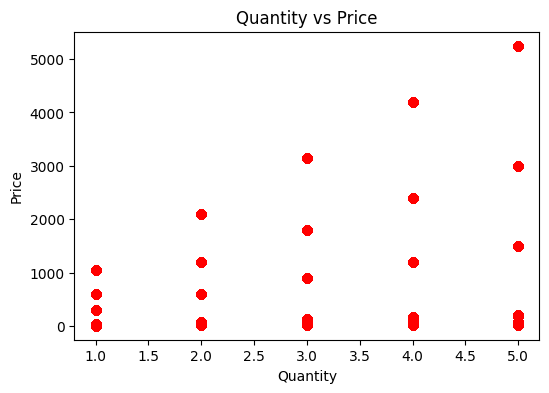

In [11]:
# Quantity vs Price
plt.figure(figsize=(6,4))
plt.scatter(df['quantity'], df['price'], c='red', alpha=0.6)
plt.title("Quantity vs Price")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.show()

### Objective 5: Feature Selection

In [12]:
preferred = [c for c in ['age', 'quantity', 'price'] if c in df.columns]

if len(preferred) >= 2:
    features = preferred
else:
    features = df.select_dtypes(include='number').columns.tolist()
    features = [c for c in features if c.lower() not in {'customerid', 'customer_id', 'invoice_no', 'invoice', 'id'}]

print("🧩 Using features:", features)

# Create feature dataframe
X = df[features].copy()

🧩 Using features: ['age', 'quantity', 'price']


### Objective 6: Feature Scaling

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)   # <-- use X, not features

print("✅ Features Scaled Successfully!")
print("\n📊 First 5 scaled values:\n", X_scaled[:5])


✅ Features Scaled Successfully!

📊 First 5 scaled values:
 [[-1.02916019e+00  1.41298366e+00  8.61837078e-01]
 [-1.49613885e+00 -2.42644985e-03  1.18070281e+00]
 [-1.56285009e+00 -1.41783656e+00 -4.13498363e-01]
 [ 1.50586680e+00  1.41298366e+00  2.45605950e+00]
 [ 6.38620726e-01  7.05278603e-01 -6.67944953e-01]]


### Objective 7: Choosing Optimal K

In [14]:
inertia = []
silhouette_scores = []
K_range = range(2, 11)

# Sample 2000 points if dataset is large
sample_size = min(2000, X_scaled.shape[0])
sample_idx = np.random.choice(X_scaled.shape[0], sample_size, replace=False)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
    labels = kmeans.labels_
    silhouette_scores.append(
        silhouette_score(X_scaled[sample_idx], labels[sample_idx])
    )



best_k = K_range[np.argmax(silhouette_scores)]
print(f"🏆 Best K chosen based on silhouette score: {best_k}")


🏆 Best K chosen based on silhouette score: 7


### Objective 8: Plots

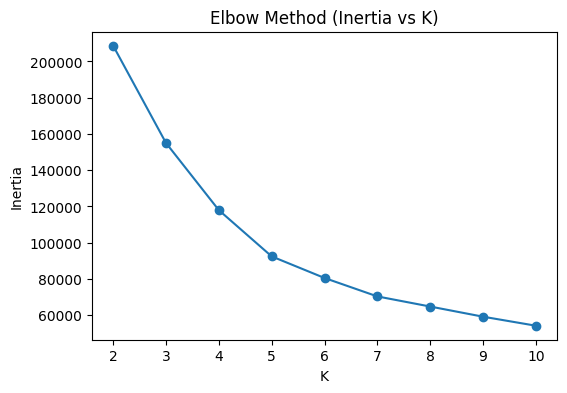

In [15]:
# Elbow plot
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method (Inertia vs K)")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.savefig("elbow_method.png")
plt.show()

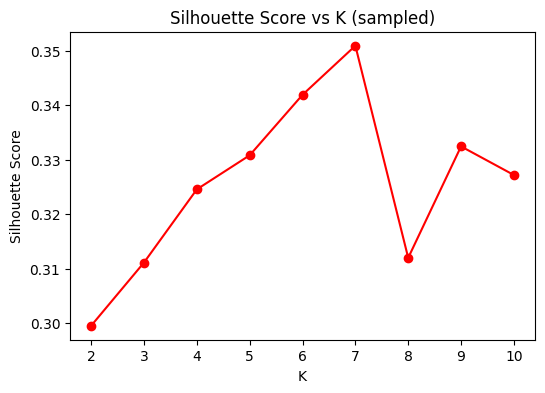

In [23]:
# Silhouette plot
plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, marker='o', color='red')
plt.title("Silhouette Score vs K (sampled)")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.show()

### Objective 9: Kmeans Cluster

In [15]:
# Apply KMeans Clustering
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("✅ KMeans Clustering Completed!")
print("\n📊 Cluster Distribution:\n", df['Cluster'].value_counts())


✅ KMeans Clustering Completed!

📊 Cluster Distribution:
 Cluster
4    18946
1    17980
3    15817
2    15080
5    15025
0    10999
6     5610
Name: count, dtype: int64


### Objective 10: Visualizations

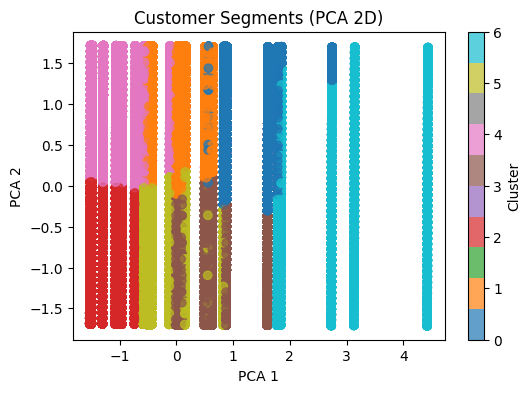

In [16]:
# PCA Visualization (2D)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,4))
plt.scatter(pca_result[:,0], pca_result[:,1], c=df['Cluster'], cmap="tab10", alpha=0.7)
plt.title("Customer Segments (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()


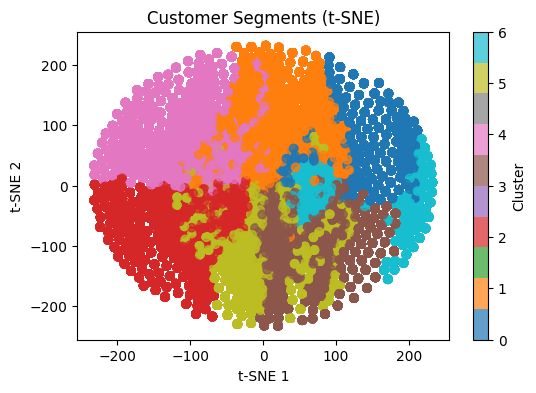

In [26]:
# t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)

plt.figure(figsize=(6,4))
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=df['Cluster'], cmap="tab10", alpha=0.7)
plt.title("Customer Segments (t-SNE)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(label="Cluster")
plt.show()


### Objective 11: Cluster Profiling

In [17]:
df['Cluster'] = kmeans.predict(X_scaled)

In [18]:
# Select numeric columns
num_cols = [c for c in ['age', 'quantity', 'price'] if c in df.columns]

# Select categorical columns 
cat_cols = [c for c in ['gender', 'category', 'payment_method', 'shopping_mall'] if c in df.columns]

In [19]:
# Cluster sizes
sizes = df['Cluster'].value_counts().sort_index()

print("==========================================")
print("👥 Cluster Sizes")
print("==========================================")
display(sizes.to_frame("Count"))

👥 Cluster Sizes


,Count
Cluster,
0,10999
1,17980
2,15080
3,15817
4,18946
5,15025
6,5610


In [20]:
# Numeric profile
profile = pd.DataFrame()
if num_cols:
    profile = df.groupby('Cluster')[num_cols].mean().round(2)
    print("\n==========================================")
    print("📊 Numeric Profile (Mean Values per Cluster)")
    print("==========================================")
    display(profile)


📊 Numeric Profile (Mean Values per Cluster)


,age,quantity,price
Cluster,,,
0,55.04,4.21,1588.81
1,56.70,3.81,231.23
2,30.68,1.33,165.63
3,29.79,4.52,562.33
4,56.65,1.49,300.32
5,30.89,2.66,662.72
6,39.78,4.32,3543.50


In [21]:
# Categorical profile
cat_profile = pd.DataFrame()
if cat_cols:
    mode = lambda s: s.mode().iloc[0] if not s.mode().empty else None
    cat_profile = df.groupby('Cluster')[cat_cols].agg(mode)
    print("\n==========================================")
    print("🧠 Dominant Categories per Cluster")
    print("==========================================")
    display(cat_profile)


🧠 Dominant Categories per Cluster


,gender,category,payment_method,shopping_mall
Cluster,,,,
0,Female,Clothing,Cash,Mall of Istanbul
1,Female,Cosmetics,Cash,Mall of Istanbul
2,Female,Clothing,Cash,Kanyon
3,Female,Clothing,Cash,Mall of Istanbul
4,Female,Clothing,Cash,Kanyon
5,Female,Clothing,Cash,Mall of Istanbul
6,Female,Technology,Cash,Mall of Istanbul


In [22]:
# ✅ Merge into one cluster_profiles for later use
if not profile.empty and not cat_profile.empty:
    cluster_profiles = profile.join(cat_profile)
elif not profile.empty:
    cluster_profiles = profile
else:
    cluster_profiles = cat_profile

### Objective 12: Marketing Strategies

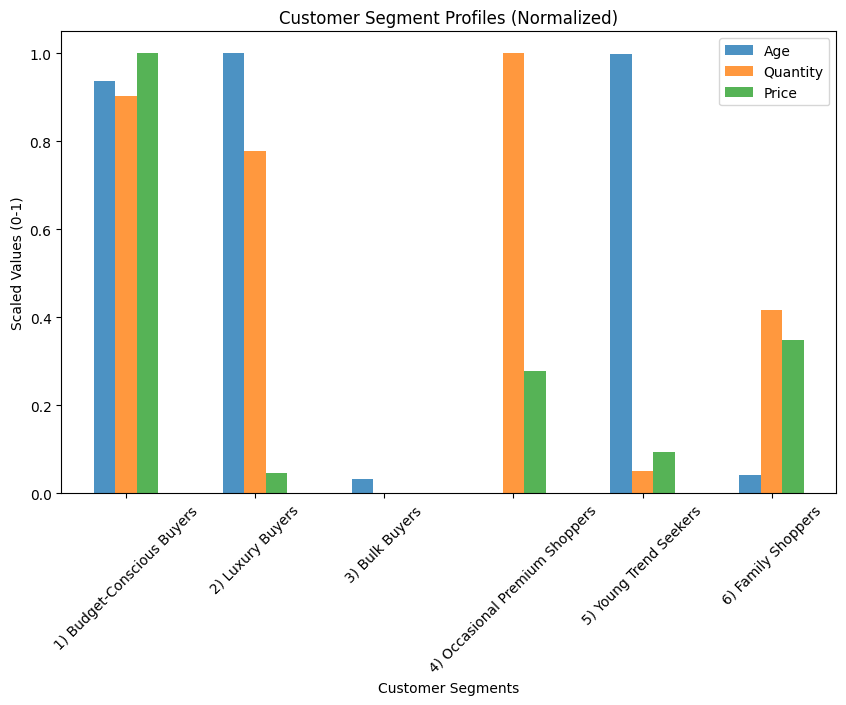

In [23]:
from sklearn.preprocessing import MinMaxScaler
# ====== Step 2: Assign meaningful labels to clusters ======
cluster_labels = {
    0: "1) Budget-Conscious Buyers",
    1: "2) Luxury Buyers",
    2: "3) Bulk Buyers",
    3: "4) Occasional Premium Shoppers",
    4: "5) Young Trend Seekers",
    5: "6) Family Shoppers"
}

cluster_profiles["Segment Name"] = cluster_profiles.index.map(cluster_labels)

# Drop NaN labels
cluster_profiles = cluster_profiles[cluster_profiles["Segment Name"].notna()]

# ====== Step 3: Create Marketing Strategies ======
strategies = {}
for cluster in cluster_profiles.index:
    age = cluster_profiles.loc[cluster, 'age']
    quantity = cluster_profiles.loc[cluster, 'quantity']
    price = cluster_profiles.loc[cluster, 'price']
    
    if price > 1000 and quantity > 3:
        strategy = "Target with premium bundle offers, loyalty programs, and exclusive deals."
    elif price < 500 and quantity > 3:
        strategy = "Promote discounts on bulk purchases and student-friendly offers."
    elif price > 1000 and quantity <= 3:
        strategy = "Encourage upselling with add-ons and personalized luxury recommendations."
    elif price < 500 and quantity <= 3:
        strategy = "Focus on budget-friendly campaigns and awareness promotions."
    else:
        strategy = "Maintain a balanced strategy with seasonal promotions and cross-selling."
    
    strategies[cluster] = strategy

# ====== Step 4: Convert to DataFrame for clean display ======
strategies_df = pd.DataFrame.from_dict(strategies, orient="index", columns=["Strategy"])
strategies_df["Segment Name"] = strategies_df.index.map(cluster_labels)
strategies_df = strategies_df[["Segment Name", "Strategy"]]

# Scale values between 0–1 for fair comparison
scaled = MinMaxScaler().fit_transform(cluster_profiles[['age', 'quantity', 'price']])
scaled_df = pd.DataFrame(scaled, columns=['Age', 'Quantity', 'Price'], index=cluster_profiles.index)
scaled_df['Segment Name'] = cluster_profiles["Segment Name"]

# Plot
scaled_df[['Age', 'Quantity', 'Price']].plot(kind='bar', figsize=(10,6), alpha=0.8)
plt.title("Customer Segment Profiles (Normalized)")
plt.ylabel("Scaled Values (0-1)")
plt.xlabel("Customer Segments")
plt.xticks(ticks=range(len(scaled_df)), labels=scaled_df["Segment Name"], rotation=45)
plt.legend()
plt.show()

In [26]:
from tabulate import tabulate

print("\n==========================================")
print(" Marketing Strategies by Segment")
print("==========================================")
print(tabulate(strategies_df, headers="keys", tablefmt="fancy_grid", showindex=False))


 Marketing Strategies by Segment
╒════════════════════════════════╤═══════════════════════════════════════════════════════════════════════════╕
│ Segment Name                   │ Strategy                                                                  │
╞════════════════════════════════╪═══════════════════════════════════════════════════════════════════════════╡
│ 1) Budget-Conscious Buyers     │ Target with premium bundle offers, loyalty programs, and exclusive deals. │
├────────────────────────────────┼───────────────────────────────────────────────────────────────────────────┤
│ 2) Luxury Buyers               │ Promote discounts on bulk purchases and student-friendly offers.          │
├────────────────────────────────┼───────────────────────────────────────────────────────────────────────────┤
│ 3) Bulk Buyers                 │ Focus on budget-friendly campaigns and awareness promotions.              │
├────────────────────────────────┼────────────────────────────────────────────

### Objective 13: Output Saving

In [27]:
# Save outputs
df.to_csv("mall_segments_labeled.csv", index=False)

pd.DataFrame({
    "Cluster": list(strategies.keys()), 
    "Strategy": list(strategies.values())
}).to_csv("segment_strategies.csv", index=False)

print("💾 Saved: mall_segments_labeled.csv, segment_strategies.csv")

💾 Saved: mall_segments_labeled.csv, segment_strategies.csv
